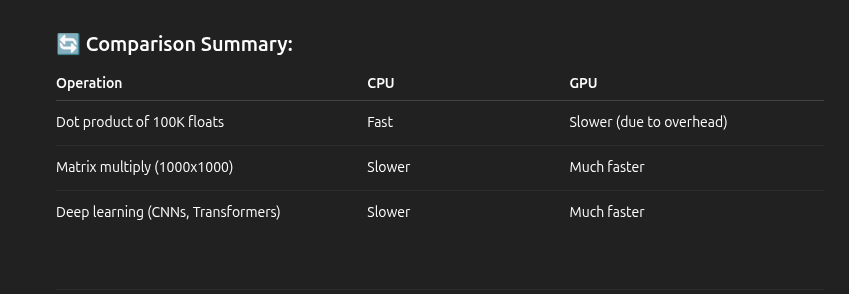

In [1]:
import numpy as np

In [3]:
a = np.array([1,2,3,4,5])
print (a)

[1 2 3 4 5]


In [2]:
import time

In [6]:
tic = time.time()
a  = np.random.rand(100000)
b  = np.random.rand(100000)
c = np.dot(a,b)
toc = time.time()
print("Vectorization time:",  1000*(toc-tic), "ms")
print(c)

Vectorization time: 2.040863037109375 ms
25051.719164325496


In [8]:
tic = time.time()
c = 0
for i in range(100000):
    c += a[i]*b[i]
toc = time.time()
print("For loop time:", 1000*(toc-tic),"ms")
print(c)

For loop time: 34.74688529968262 ms
25051.719164325692


In [34]:
c

24840.99896273378

In [10]:
import torch

tic = time.time()
a = torch.rand(100000)
b = torch.rand(100000)
c = torch.dot(a, b)
toc = time.time()

print("Vectorization time:", 1000 * (toc - tic), "ms")
print(c.item())


Vectorization time: 1.627206802368164 ms
24884.625


In [12]:
import torch
import time

# Ensure CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Move tensors to GPU
a = torch.rand(100000, device=device)
b = torch.rand(100000, device=device)

# Synchronize before starting the timer
torch.cuda.synchronize()
tic = time.time()

# Perform dot product
c = torch.dot(a, b)

# Synchronize after operation to get accurate timing
torch.cuda.synchronize()
toc = time.time()

print("Vectorization time (GPU):", 1000 * (toc - tic), "ms")
print(c.item())


Using device: cuda
Vectorization time (GPU): 30.486583709716797 ms
24976.396484375


In [14]:
import torch
import time

# Matrix size
N = 1000

# CPU version
A_cpu = torch.rand(N, N)
B_cpu = torch.rand(N, N)

tic_cpu = time.time()
C_cpu = torch.matmul(A_cpu, B_cpu)
toc_cpu = time.time()

print("CPU matrix multiplication time:", 1000 * (toc_cpu - tic_cpu), "ms")

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")

    # Move matrices to GPU
    A_gpu = torch.rand(N, N, device=device)
    B_gpu = torch.rand(N, N, device=device)

    # GPU timing with synchronization
    torch.cuda.synchronize()
    tic_gpu = time.time()
    C_gpu = torch.matmul(A_gpu, B_gpu)
    torch.cuda.synchronize()
    toc_gpu = time.time()

    print("GPU matrix multiplication time:", 1000 * (toc_gpu - tic_gpu), "ms")
else:
    print("CUDA GPU not available.")


CPU matrix multiplication time: 13.394355773925781 ms
GPU matrix multiplication time: 1.0478496551513672 ms
